<a href="https://colab.research.google.com/github/jeremontoya155/Montoya_clasificacion/blob/main/Clasifiacion_Montoya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Desarrollar un Árbol de Decisión de Clasificación con el dataset propuesto para el proyecto final del curso. 



In [2]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
import pandas as pd
#Entreanar el modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
#Visualizar
from sklearn.tree import plot_tree
#importamos tambien matplotlib para ampliar 
import matplotlib.pyplot as plt 
#Interpretar el modeo
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


In [4]:
df=pd.read_csv("/content/dataset-of-00s.csv")

In [5]:
#Muestreo general de data
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [7]:
#Vemos los valores nulos y vemos la descripcion basica de la tabla 
df.describe()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000
mean,0.542931,0.694511,5.276396,-7.449258,0.645095,0.092360,0.214374,0.150917,0.196141,0.482262,121.613018,2.581706e+05,3.913999,40.734295,11.056880,0.500000
std,0.190003,0.237792,3.564153,5.102543,0.478525,0.094997,0.296511,0.301452,0.161965,0.254567,30.179885,1.395341e+05,0.404280,20.245637,5.758186,0.500043
min,0.058800,0.000348,0.000000,-47.327000,0.000000,0.022400,0.000000,0.000000,0.019300,0.000000,46.755000,1.592000e+04,0.000000,0.000000,1.000000,0.000000
25%,0.416000,0.567000,2.000000,-8.315000,0.000000,0.036175,0.004553,0.000000,0.093700,0.278000,96.984000,2.068130e+05,4.000000,27.507507,9.000000,0.000000
50%,0.556000,0.744000,5.000000,-6.041500,1.000000,0.052700,0.060300,0.000022,0.131000,0.486000,119.999000,2.380065e+05,4.000000,36.037160,10.000000,0.500000
75%,0.681000,0.885000,8.000000,-4.562500,1.000000,0.107000,0.312000,0.047275,0.263000,0.687000,141.495250,2.791600e+05,4.000000,47.889570,12.000000,1.000000
max,0.986000,0.999000,11.000000,1.137000,1.000000,0.950000,0.996000,0.998000,0.987000,0.982000,213.233000,4.170227e+06,5.000000,262.615400,169.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             5872 non-null   object 
 1   artist            5872 non-null   object 
 2   uri               5872 non-null   object 
 3   danceability      5872 non-null   float64
 4   energy            5872 non-null   float64
 5   key               5872 non-null   int64  
 6   loudness          5872 non-null   float64
 7   mode              5872 non-null   int64  
 8   speechiness       5872 non-null   float64
 9   acousticness      5872 non-null   float64
 10  instrumentalness  5872 non-null   float64
 11  liveness          5872 non-null   float64
 12  valence           5872 non-null   float64
 13  tempo             5872 non-null   float64
 14  duration_ms       5872 non-null   int64  
 15  time_signature    5872 non-null   int64  
 16  chorus_hit        5872 non-null   float64


In [10]:
#Separamos la variables que vamos a usar para el analisis 
model=DecisionTreeClassifier(max_depth=4)

In [36]:
#Seleccionamos las variables predictoras
#Retiramos las variables String
X=df.iloc[:,3:17]
X=pd.get_dummies(data=X)
#Variable a predecir 
Y=df["target"]
X.head()



,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit
0,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059
1,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106
2,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887
3,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528
4,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384


In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.75,random_state=0)

In [38]:
#con el max_depth limitamos la cantidad
arbol=DecisionTreeClassifier(max_depth=4)
arbol_target=arbol.fit(X_train,Y_train)

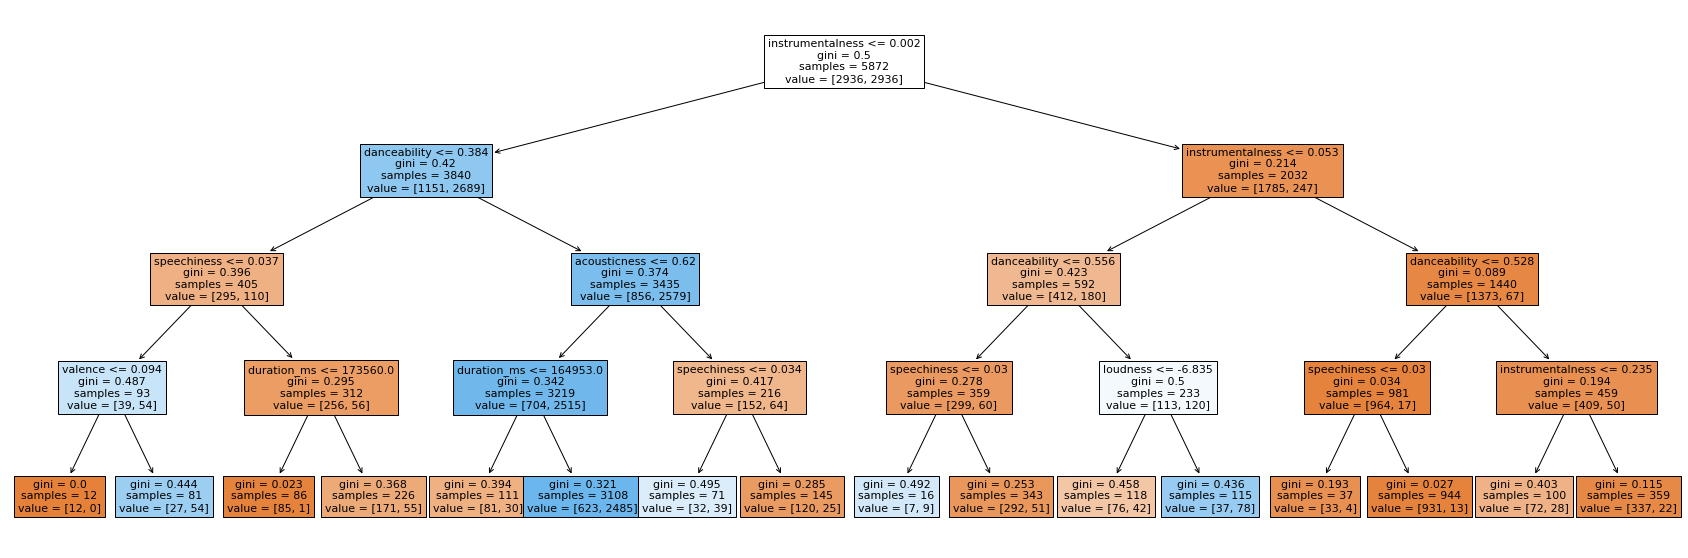

In [43]:
plt.figure(figsize=(30,10))
plot_tree(decision_tree=model,feature_names=X.columns, filled=True,fontsize=11);

In [44]:
#Vemos las predicciones
y_pred=model.predict(X)

In [45]:
df["pred"]=y_pred

In [53]:
#Funcion para las visualizaciones
def mostrar(lista):
  for e  in lista:
    sns.histplot(x=df[e],hue=df.target)
    plt.show()

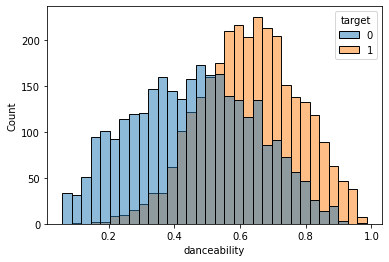

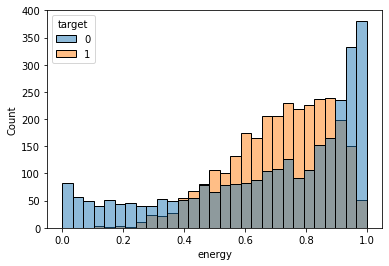

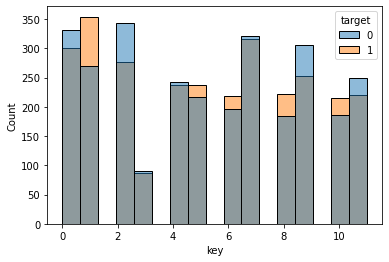

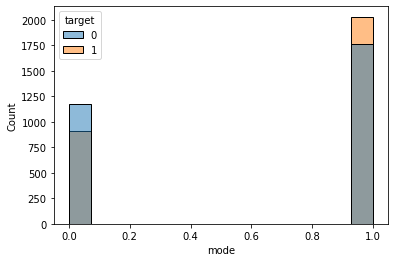

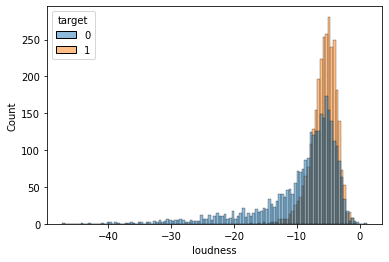

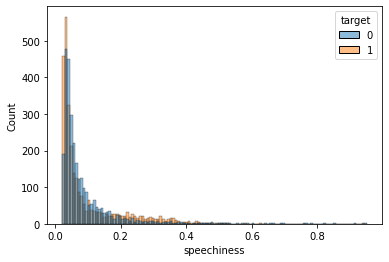

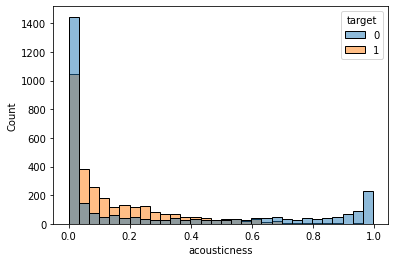

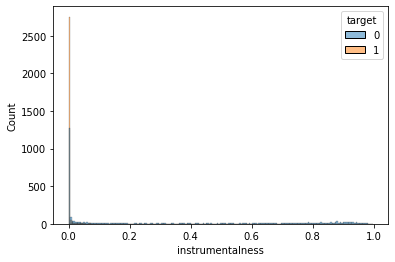

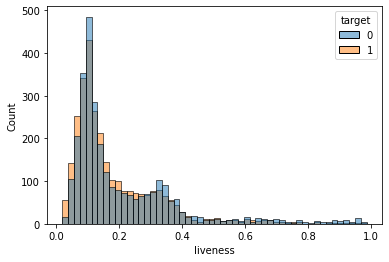

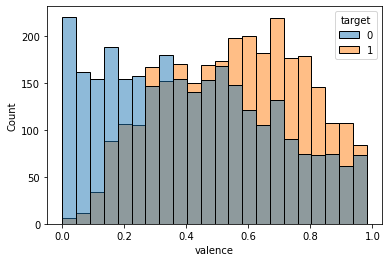

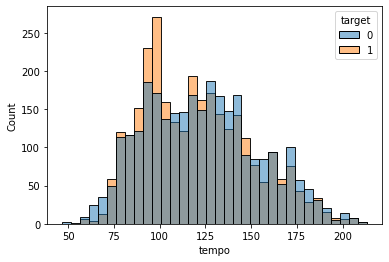

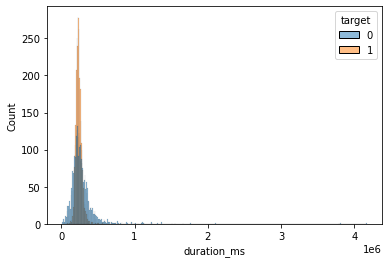

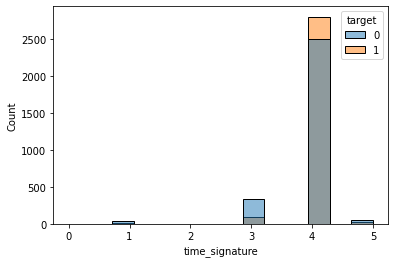

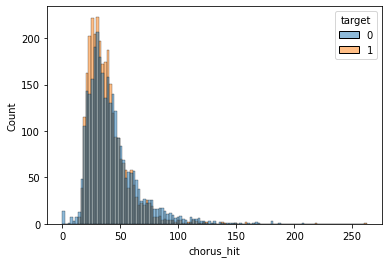

In [56]:
#Damos algunas vistas para el target

lista=["danceability","energy","key","mode","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_ms","time_signature","chorus_hit"]
mostrar(lista)

In [57]:
#Mostramos la vision de un par de casos
df.sample(10)[["pred","target"]]

,pred,target
569,0,0
4419,0,0
72,1,1
257,1,1
180,0,0
4689,1,0
5838,0,0
549,1,1
4239,1,1
2525,0,0


In [61]:
#Generamos la matriz de confunsion para ser bien exactos
Y_pred=arbol_target.predict(X_test)
MC=confusion_matrix(Y_test,Y_pred)
MC

array([[543, 185],
       [ 89, 651]])

In [62]:
#Calculamos el valor de la precision del modelo

precision=np.sum(MC.diagonal())/np.sum(MC)
print("%",precision*100)

% 81.33514986376021


In [64]:
#Precision del target 0
precision_C=((MC[0,0])/sum(MC[0,]))
print("%",precision_C*100)

% 74.58791208791209


In [66]:
#Precision del target 1
precision_U=((MC[1,1])/sum(MC[1,]))
print("%",precision_U*100)

% 87.97297297297297
